# Segmentación de clientes

Problematica: El equipo de marketing siempre está dispuesto a realizar campañas para aumentar las ventas, y es sumamente importante entender a los clientes para poder brindarles soluciones especificas.

Tener a los clientes segmentados, no solo por cantidad de ventas, como tradicionalmente se realiza, sino teniendo en cuenta otras variables, podría ayudarnos a entender mucho mejor a nuestros clientes.

El segmentar correctamente al cliente basado en su comportamiento, al perfil, y demás caracteristicas nos pueden ayudar a dirigir mejor aquellas campañas y por ende obtener mejores beneficios.

Objetivo: Bajo una base de datos de los clientes de un banco, vamos a realizar una segmentación basados en su comportamiento de compra. 

# Importar Librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Obtener Datos

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/7r1b0l1/DS-Projects/main/Marketing_data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Visualizacion de datos

<AxesSubplot:>

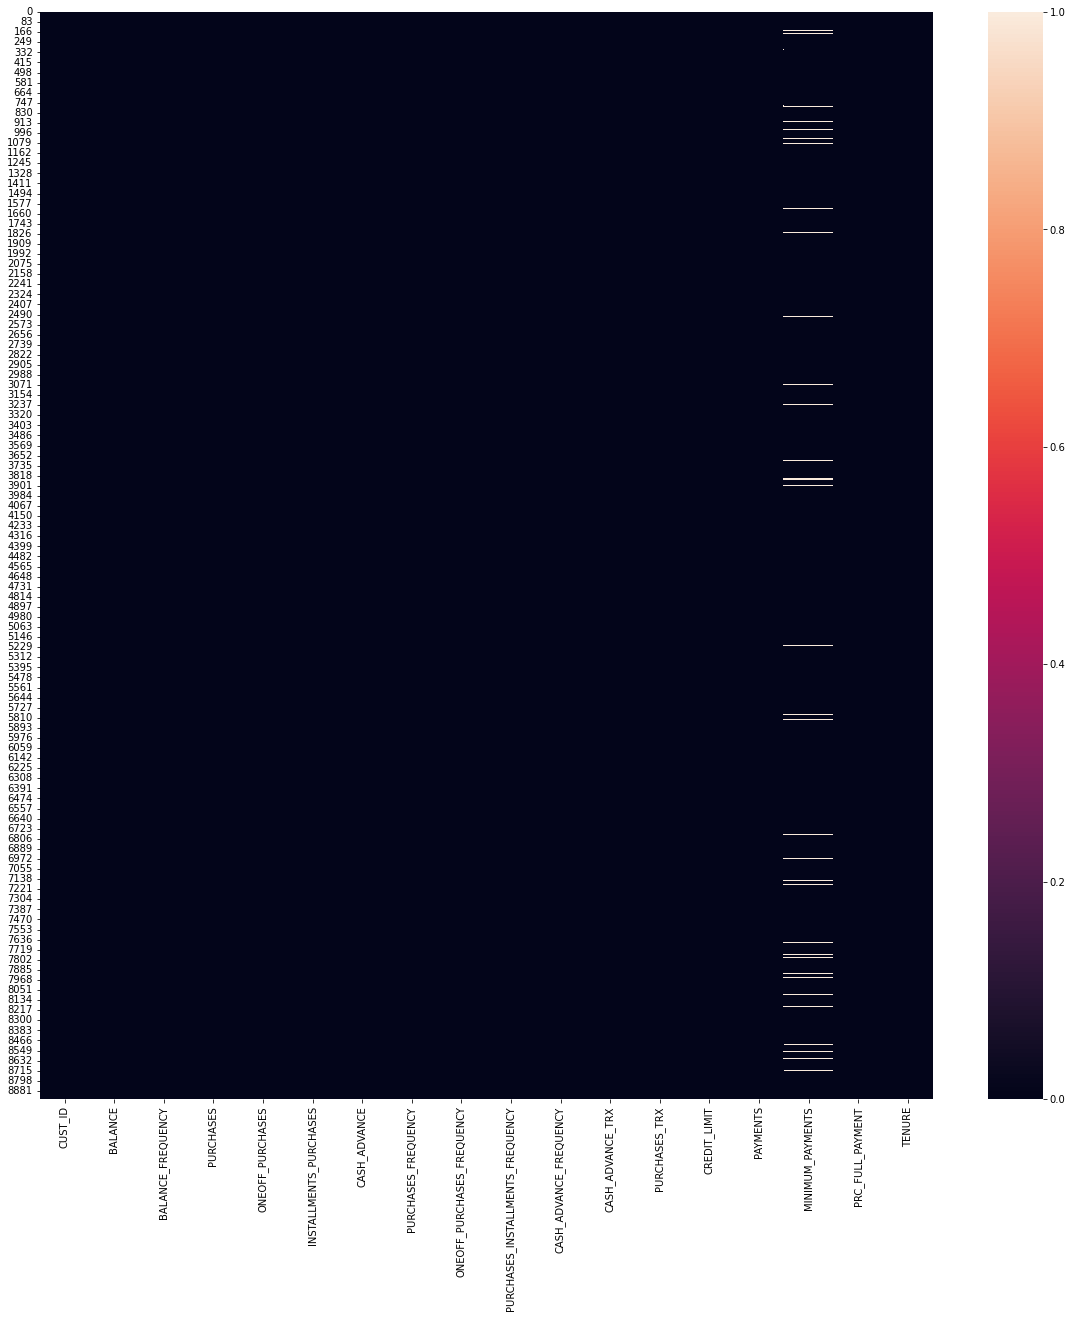

In [6]:
#Revisando si hay valores nulos en el dataset
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
#método 1 apply lambda
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].apply(lambda x: df["MINIMUM_PAYMENTS"].mean() if pd.isna(x) == True else x)
#método 2 loc
df.loc[(df["CREDIT_LIMIT"].isnull() == True),"CREDIT_LIMIT"] = df["CREDIT_LIMIT"].mean()


In [9]:
df.loc[(df["CREDIT_LIMIT"].isnull() == True),"CREDIT_LIMIT"] = df["CREDIT_LIMIT"].mean()

<AxesSubplot:>

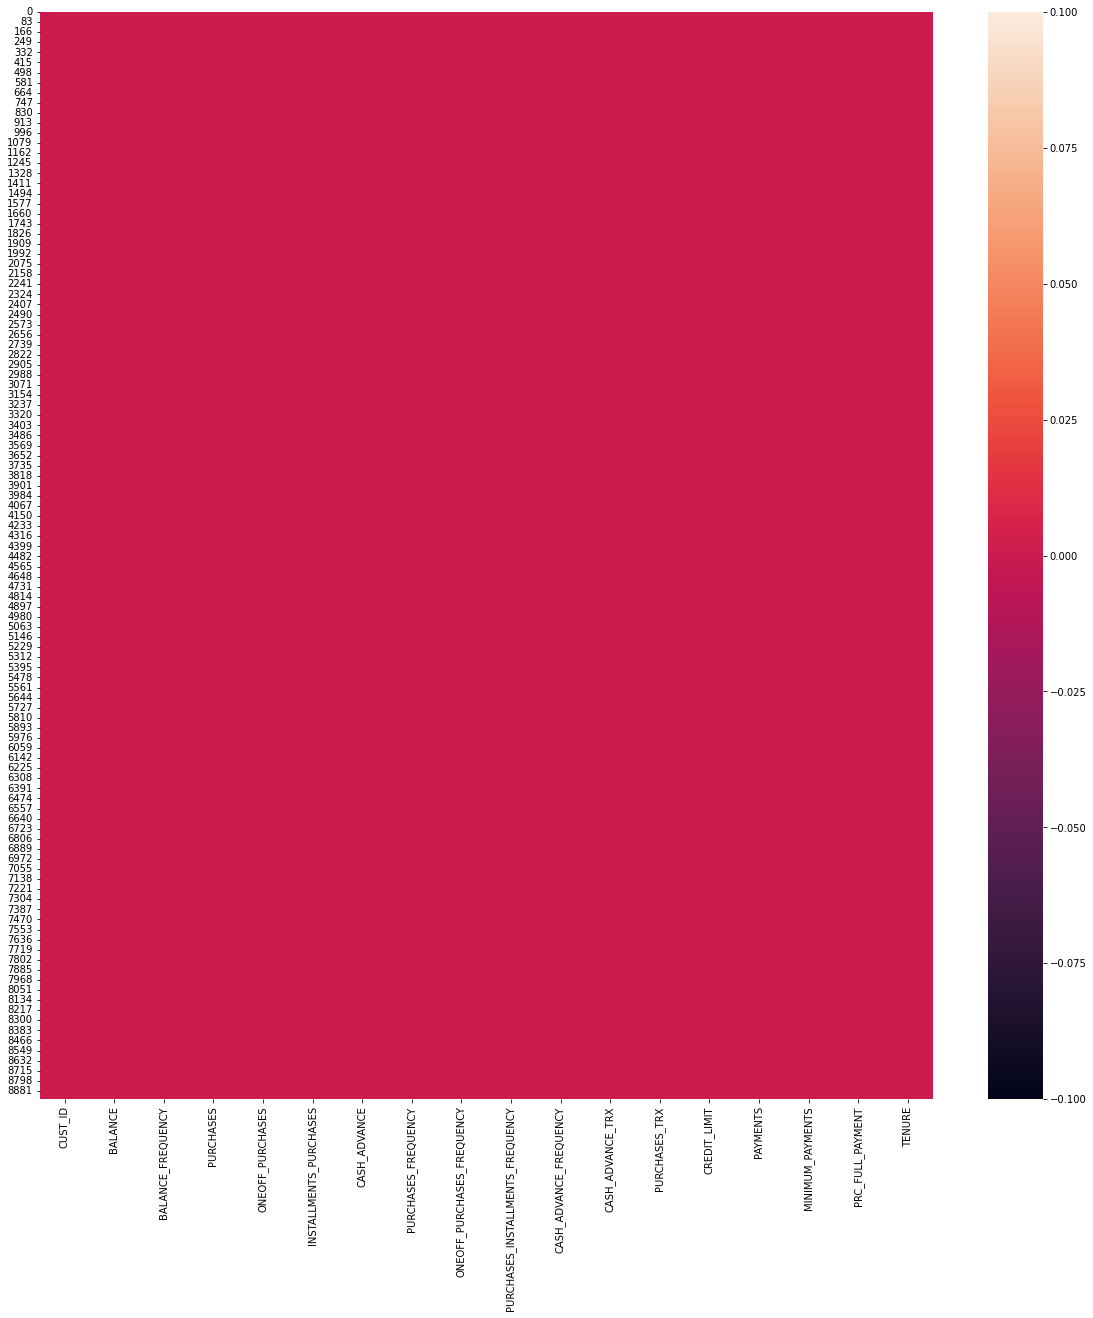

In [10]:
#Revisando si hay valores nulos en el dataset
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull())

In [11]:
#Revisar si un cliente aparece 2 veces
print(df["CUST_ID"].duplicated().sum(), df.duplicated().sum())

0 0


In [12]:
df.drop("CUST_ID",axis=1,inplace=True)

In [13]:
len(df.columns)

17

In [14]:
cols = df.columns
cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

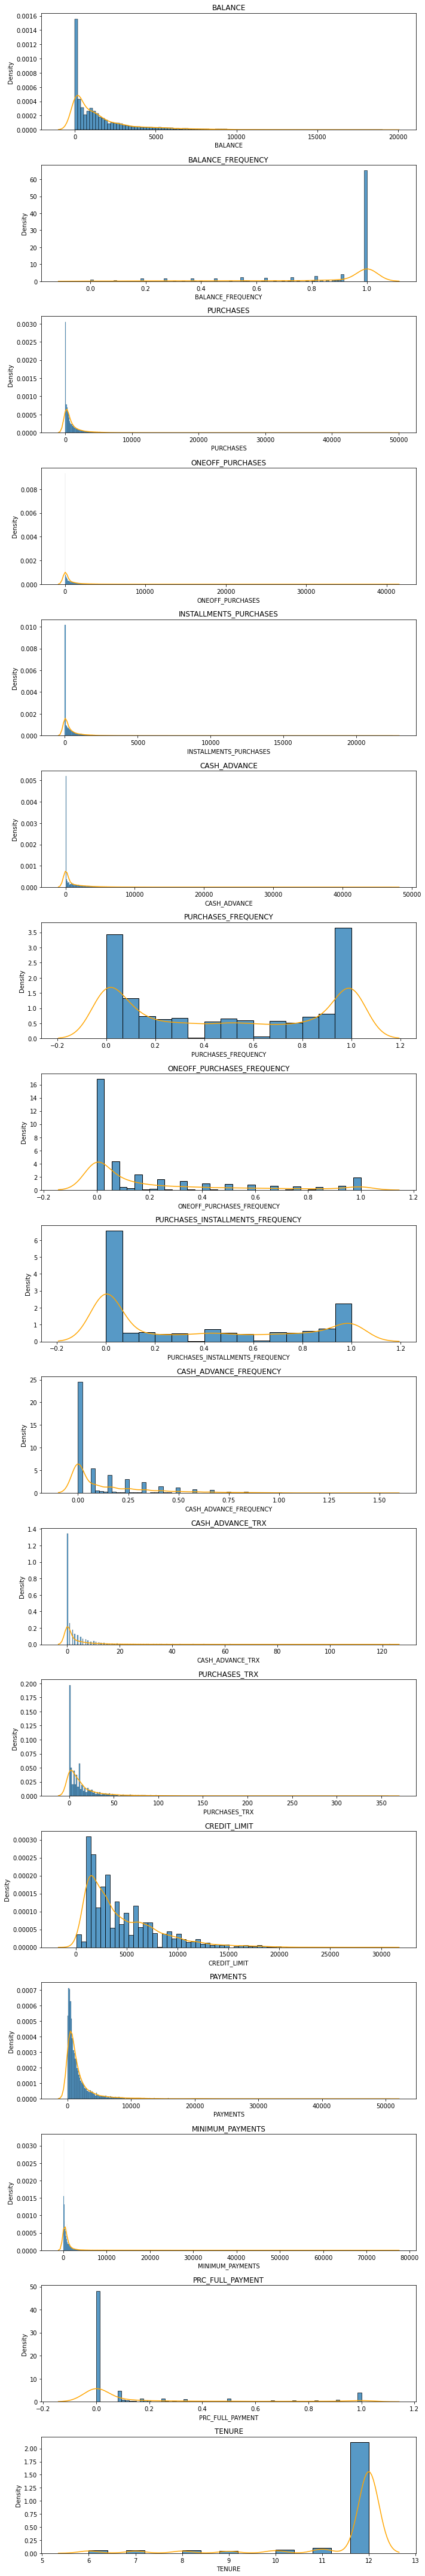

In [15]:
plt.figure(figsize=(10,60))
for i in range(len(cols)):
    plt.subplot(len(cols),1,i+1)
    sns.histplot(data=df,x=df.columns[i],stat='density')
    sns.kdeplot(data=df,x=df.columns[i], color='orange')
    plt.title(df.columns[i])
plt.tight_layout()

In [16]:
# según lo mostrado en los gráficos anteriores:
# # 
# BALANCE: Mayoria por debajo de los 5K USD
# BALANCE_FREQUENCY: La mayoria actualiza con mucha frecuencia el balance
# PURCHASES: La mayoria realiza con valores bajos x<5000 USD
# ONEOFFPURCHASES: El valor de las compras a sin cuotas en bajo 3000 usd
# INSTALLMENTS_PURCHASES: el valor de las compras a cuotas en bajo 1000 usd
# CASH_ADVANCE: La gente que pide adelantos, lo pide por poca cantidad
# PURCHASES_FREQUENCY:  Aquí, se ve que existen grupos los cuales compran mucho y otros poco
# ONEOFF_PURCHASES_FREQUENCY: la mayoria parece que compra muy poco sin cuotas 
# PURCHASES_INSTALLMENTS_FREQUENCY: existen dos grupos, donde sí compran a cuotas
# CASH_ADVANCE_FREQUENCY: lo normal es no pedir adelanto
# CASH_ADVANCE_TRX: lo normal es no pedir adelanto
# PURCHASES_TRX: la mayoria realiza pocas tranx
# CREDIT_LIMIT: la linea de crédito en mayoria tiene 200k
# PAYMENTS: casi todos estan por debajo de 8k
# MINIMUM_PAYMENTS: poco realizan pagos minimos
# PRC_FULL_PAYMENT: pocos realizan los pagos completos de deuda. 
# TENURE: La gran mayoria de clientes, tiene 12 años de clientes.

<AxesSubplot:>

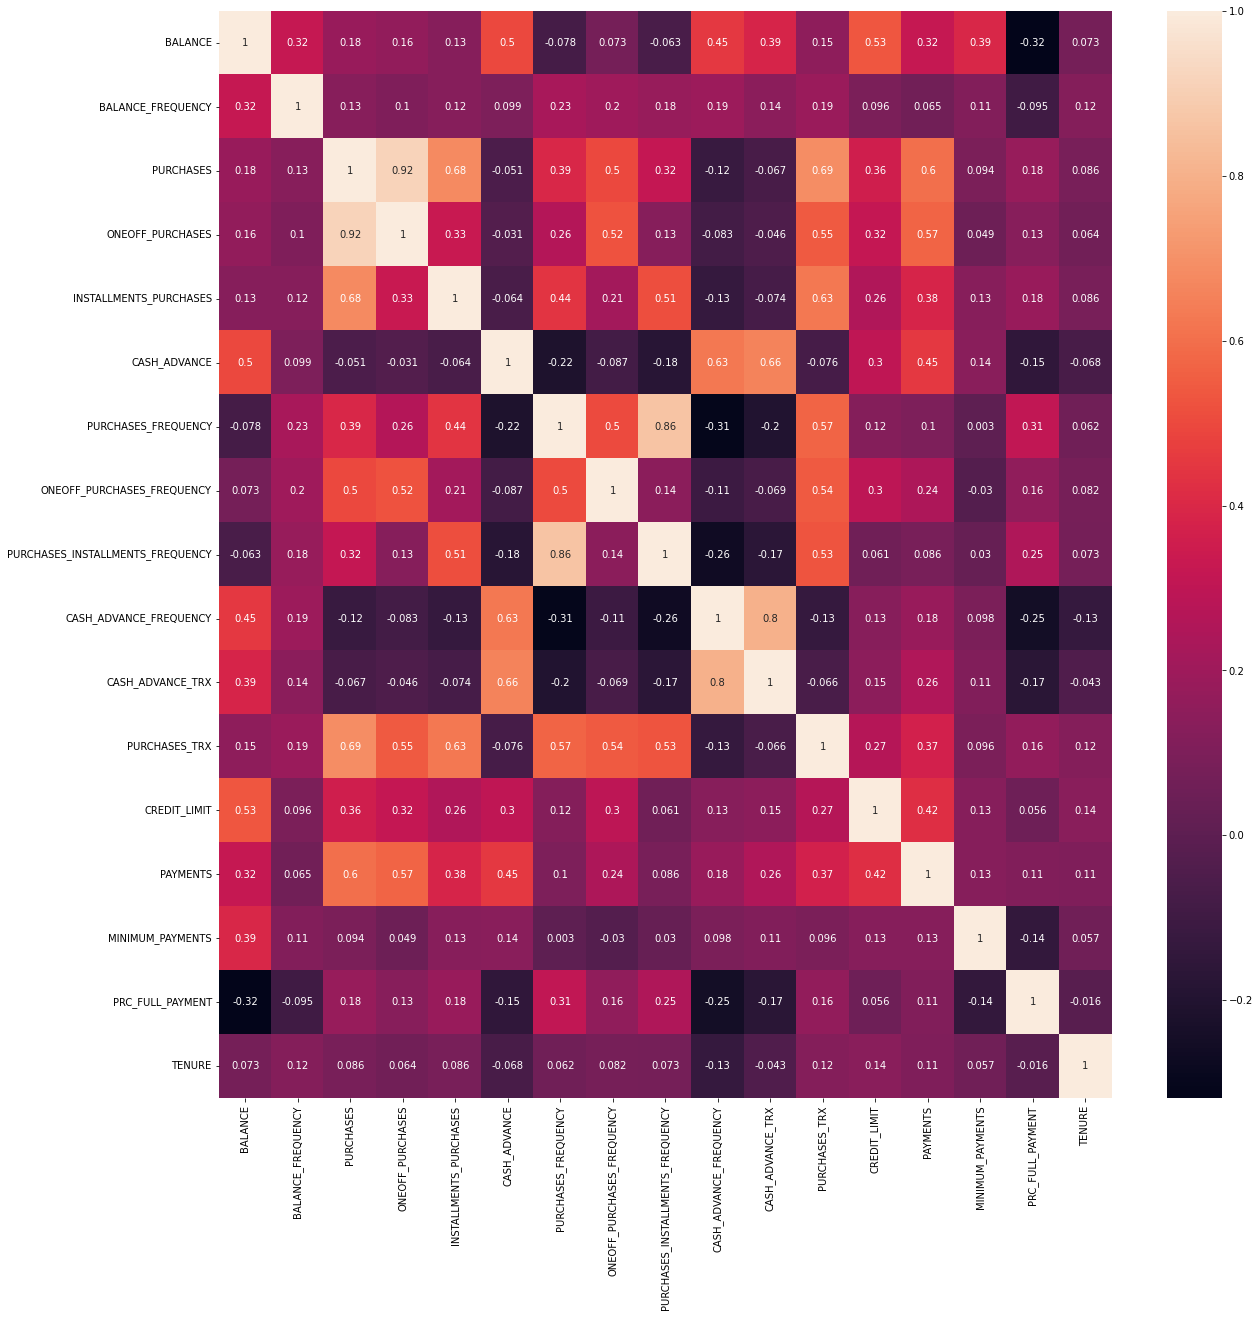

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Preparando data para modelo KNN

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

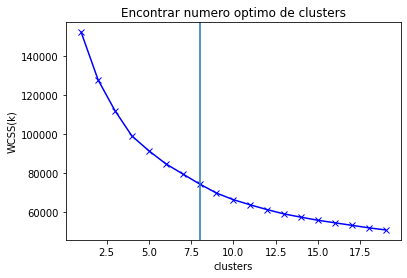

In [19]:
scores_1 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_) #suma de los cuadrados intra-clusters
    
plt.plot(range(1,20),scores_1, "bx-")
plt.title("Encontrar numero optimo de clusters")
plt.xlabel("clusters")
plt.ylabel("WCSS(k)")
plt.axvline(x=8) #punto donde yo considero, el tener más clusters no desacelera de la misma forma
plt.show()

In [20]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_
labels

array([5, 1, 7, ..., 3, 3, 3])

In [21]:
kmeans.cluster_centers_.shape

(8, 17)

In [22]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.700916,-2.135919,-0.309790,-0.234351,-0.301835,-0.322887,-0.552623,-0.440210,-0.438526,-0.522023,-0.376648,-0.418105,-0.175016,-0.201945,-0.257046,0.284044,0.201773
1,1.673952,0.390676,-0.220295,-0.156602,-0.233247,1.997835,-0.479816,-0.210838,-0.420704,1.909771,1.915410,-0.269489,1.015585,0.813735,0.548554,-0.391364,0.071452
2,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
3,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669
4,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
5,0.008319,0.404758,-0.354560,-0.239274,-0.398654,-0.099238,-0.842185,-0.384579,-0.751071,0.094588,-0.034397,-0.478209,-0.305633,-0.252008,-0.012929,-0.454943,0.274563
6,-0.357965,0.332433,-0.029606,-0.240593,0.371813,-0.362520,0.997057,-0.380677,1.208315,-0.471903,-0.359553,0.195249,-0.259534,-0.213084,-0.029779,0.313067,0.255413
7,-0.122428,0.402972,0.564104,0.683813,0.077330,-0.332418,0.997807,1.912962,0.214059,-0.416855,-0.333194,0.658784,0.463326,0.162640,-0.156145,0.458727,0.274024


In [23]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,105.576699,0.371291,341.333789,203.462143,138.122110,301.761115,0.268556,0.071134,0.190156,0.030682,0.678481,4.317300,3857.670417,1148.533664,265.172405,0.236793,11.787342
1,5048.665508,0.969818,532.540908,332.510624,200.145687,5168.424082,0.297777,0.139560,0.197239,0.517309,16.320091,8.011351,8189.562481,4088.827136,2142.587532,0.039248,11.612940
2,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
3,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019
4,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
5,1581.790610,0.973154,245.681983,195.290910,50.569859,770.764345,0.152341,0.087730,0.065942,0.154072,3.014090,2.823338,3382.430154,1003.605789,834.075220,0.020652,11.884754
6,819.401487,0.956021,939.952078,193.102063,747.293110,218.649226,0.890518,0.088894,0.844653,0.040712,0.795139,19.562996,3550.158830,1116.287417,794.807299,0.245281,11.859127
7,1309.651867,0.972731,2208.422275,1727.426467,480.995807,281.776015,0.890819,0.773131,0.449510,0.051727,0.975022,31.084746,6180.220582,2203.971601,500.317435,0.287885,11.884032


In [24]:
df_kmeans = pd.concat([df,pd.DataFrame({"Cluster":labels})],axis=1)
df_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


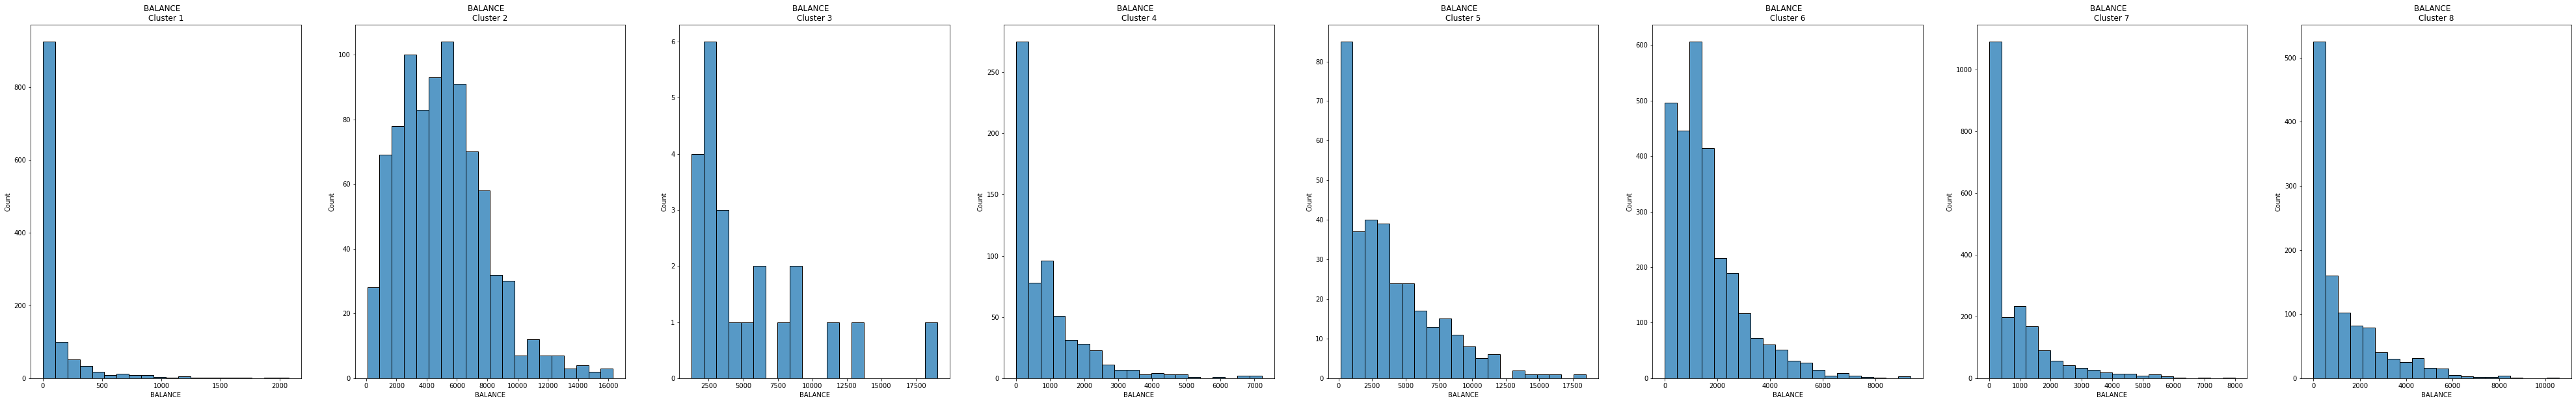

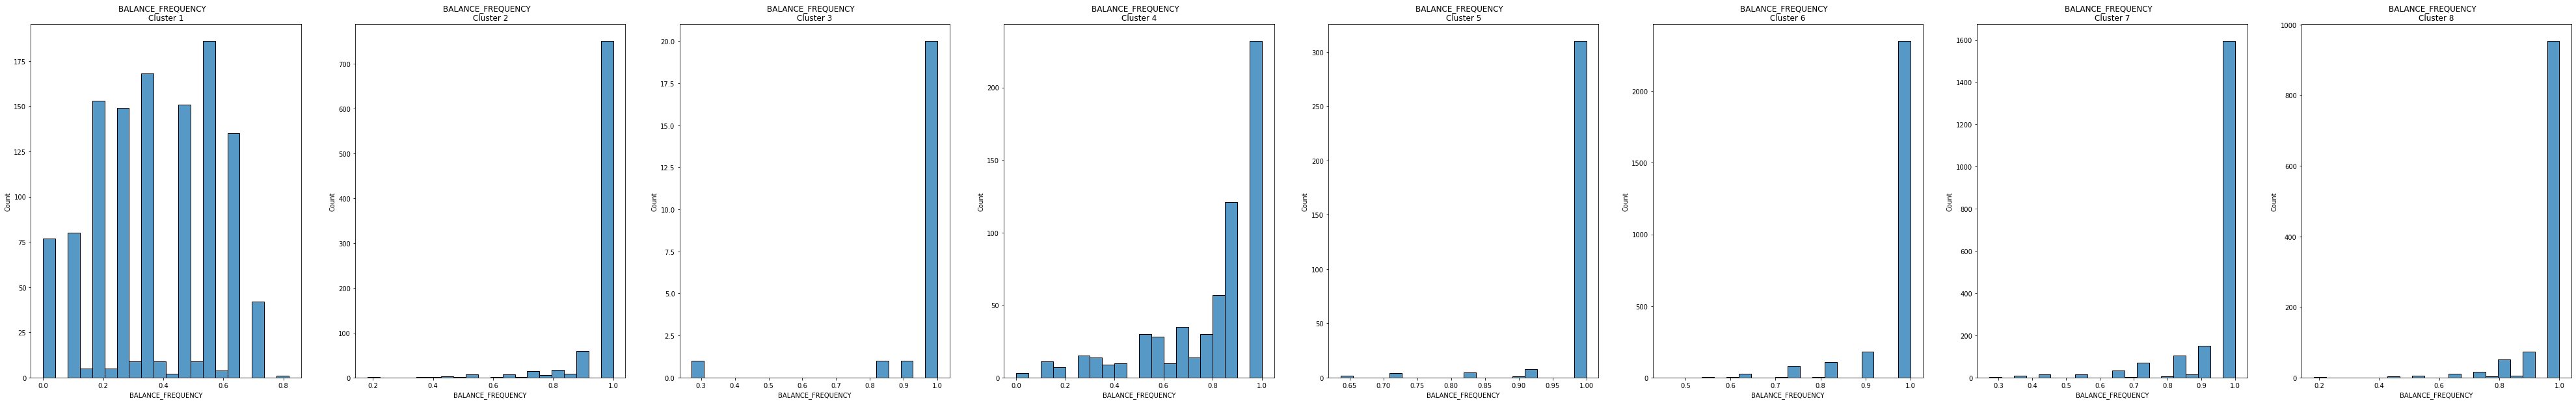

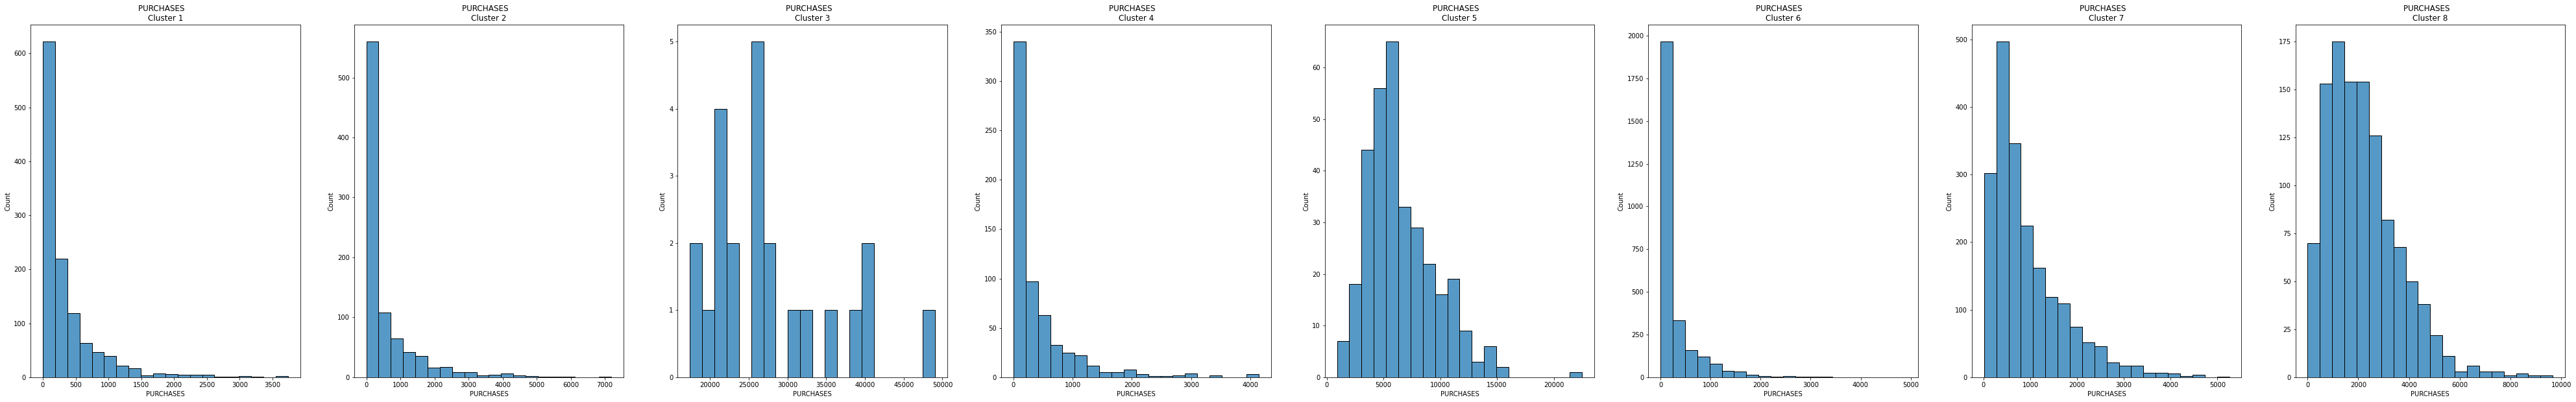

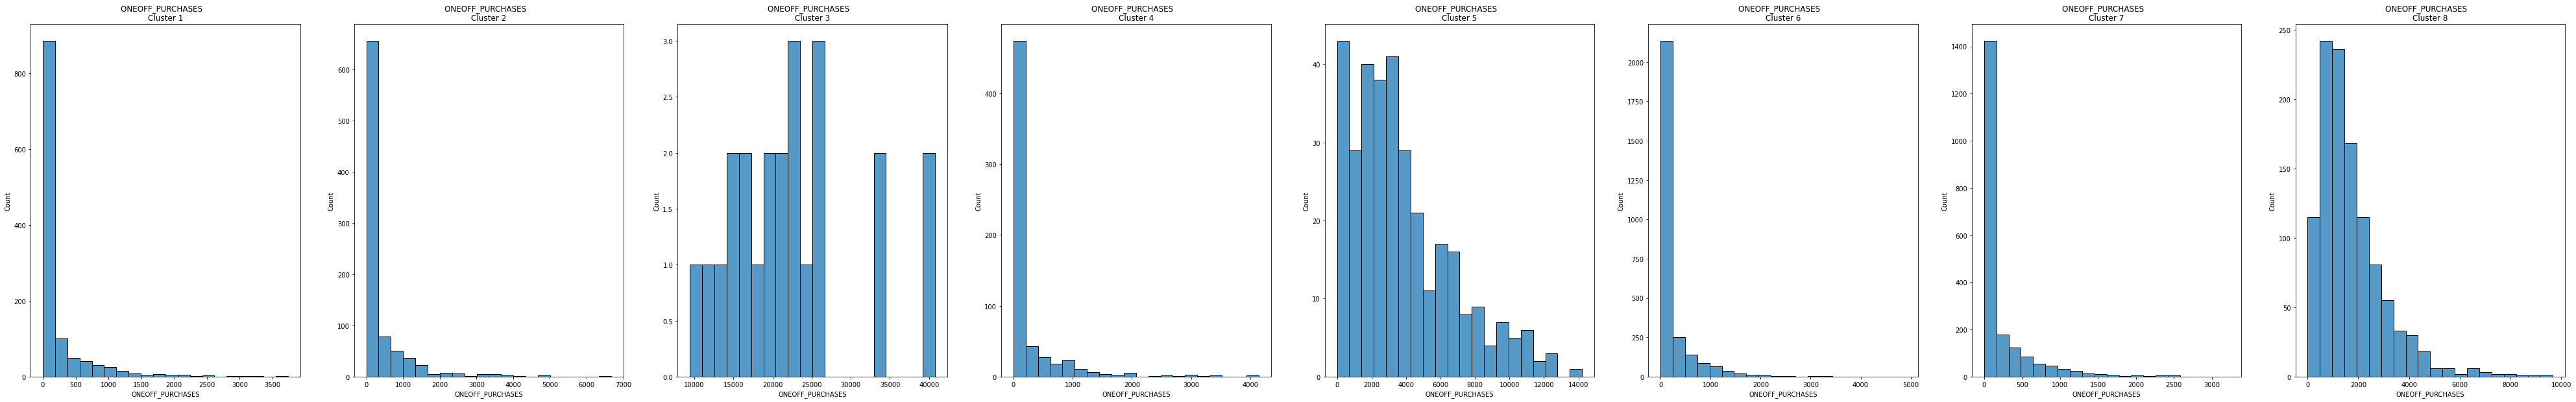

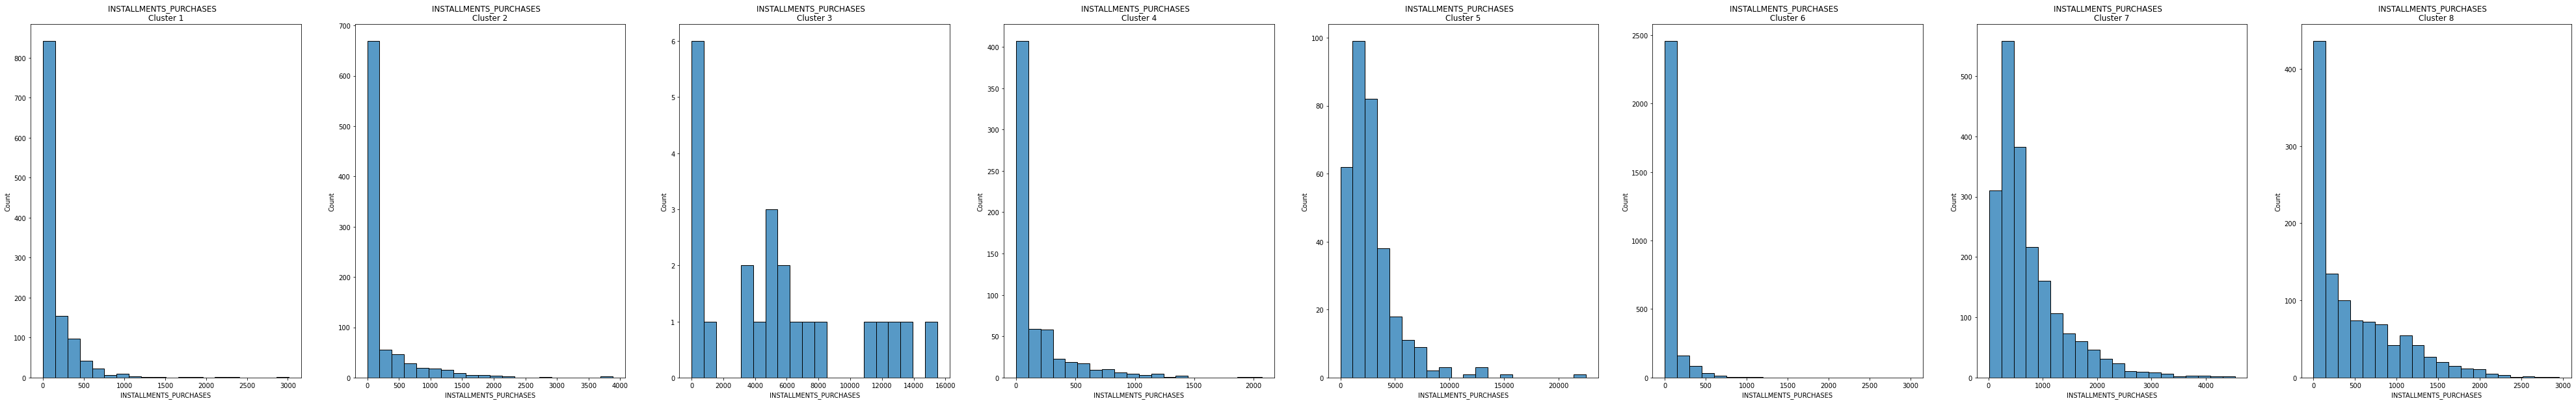

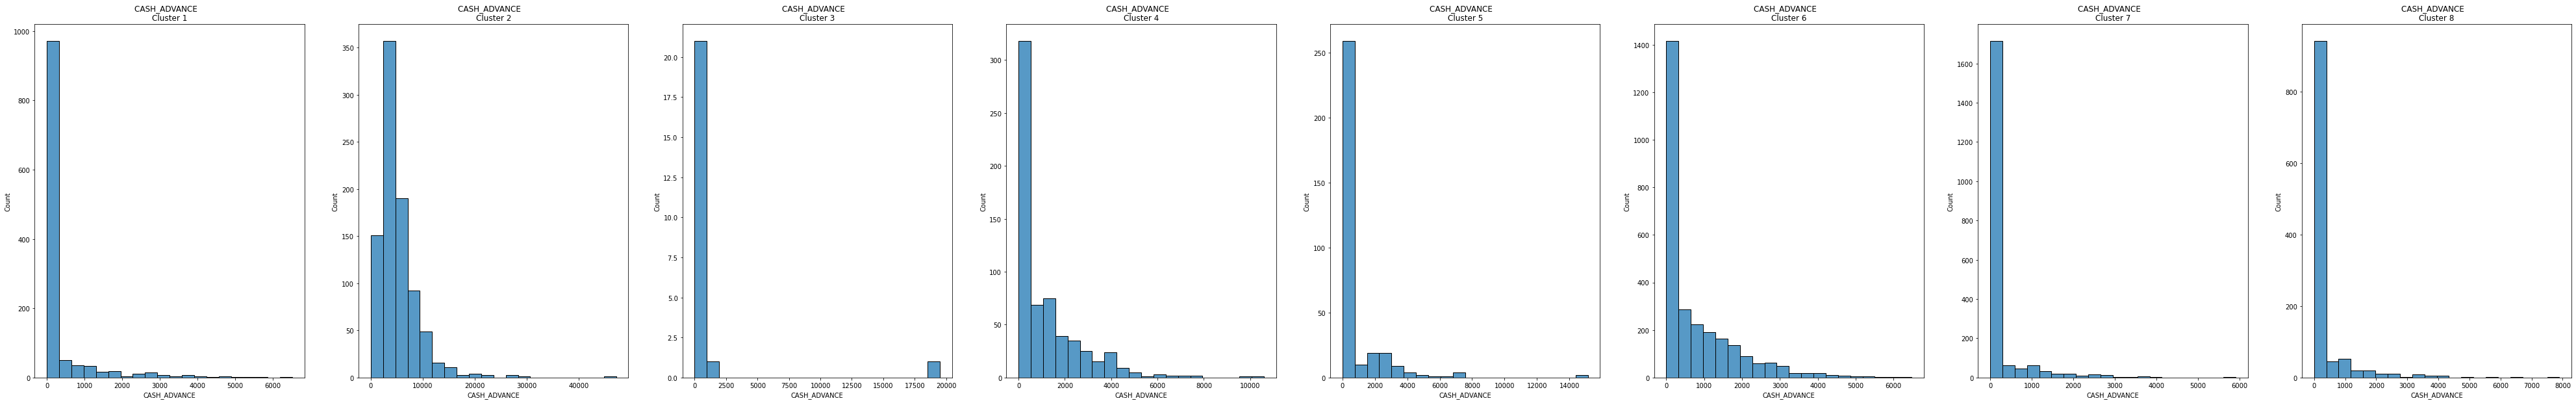

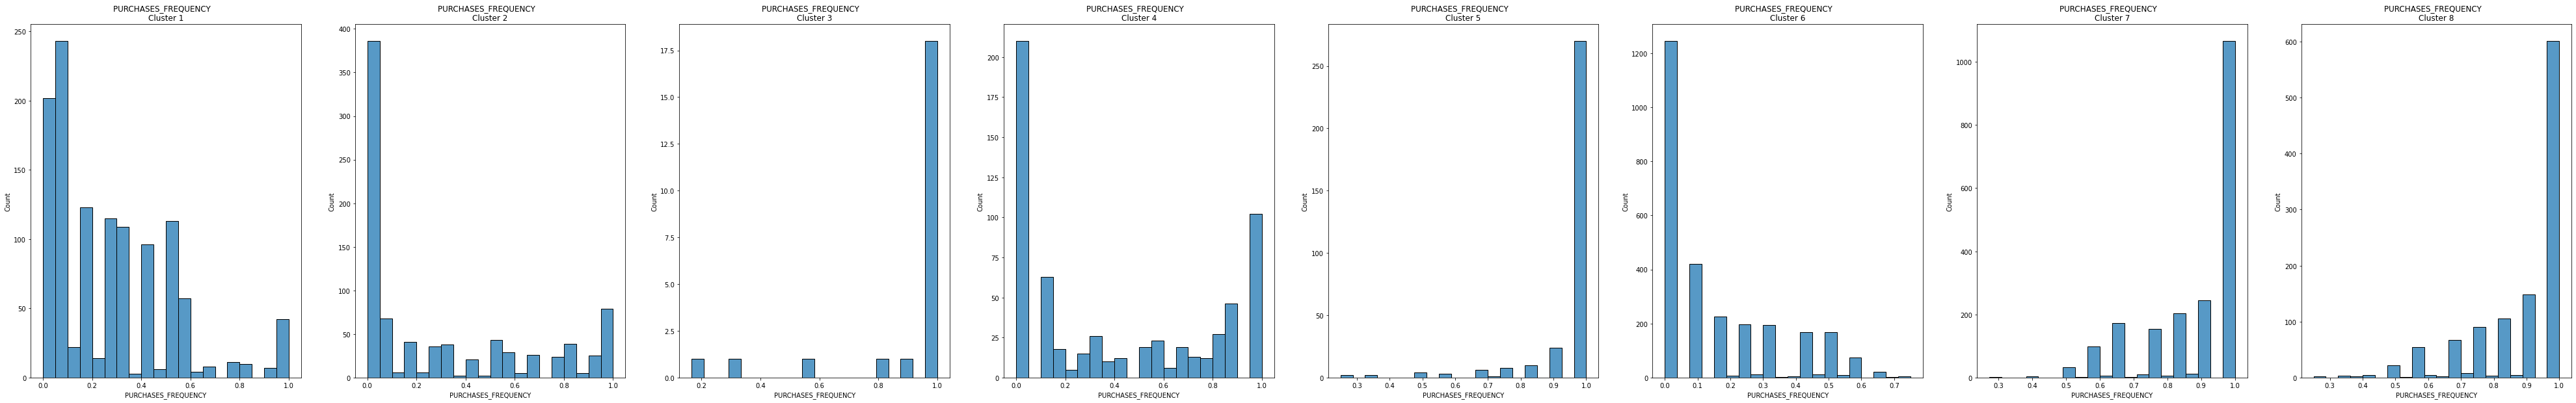

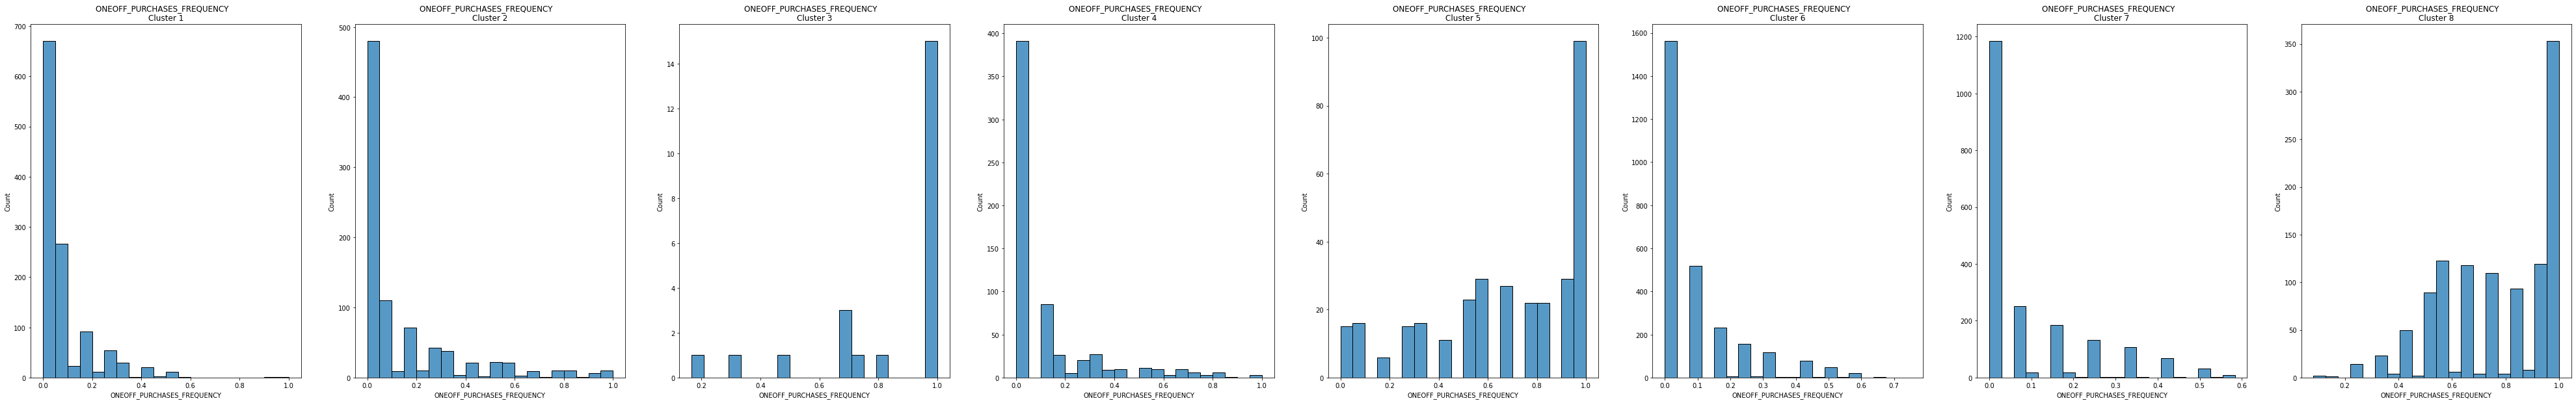

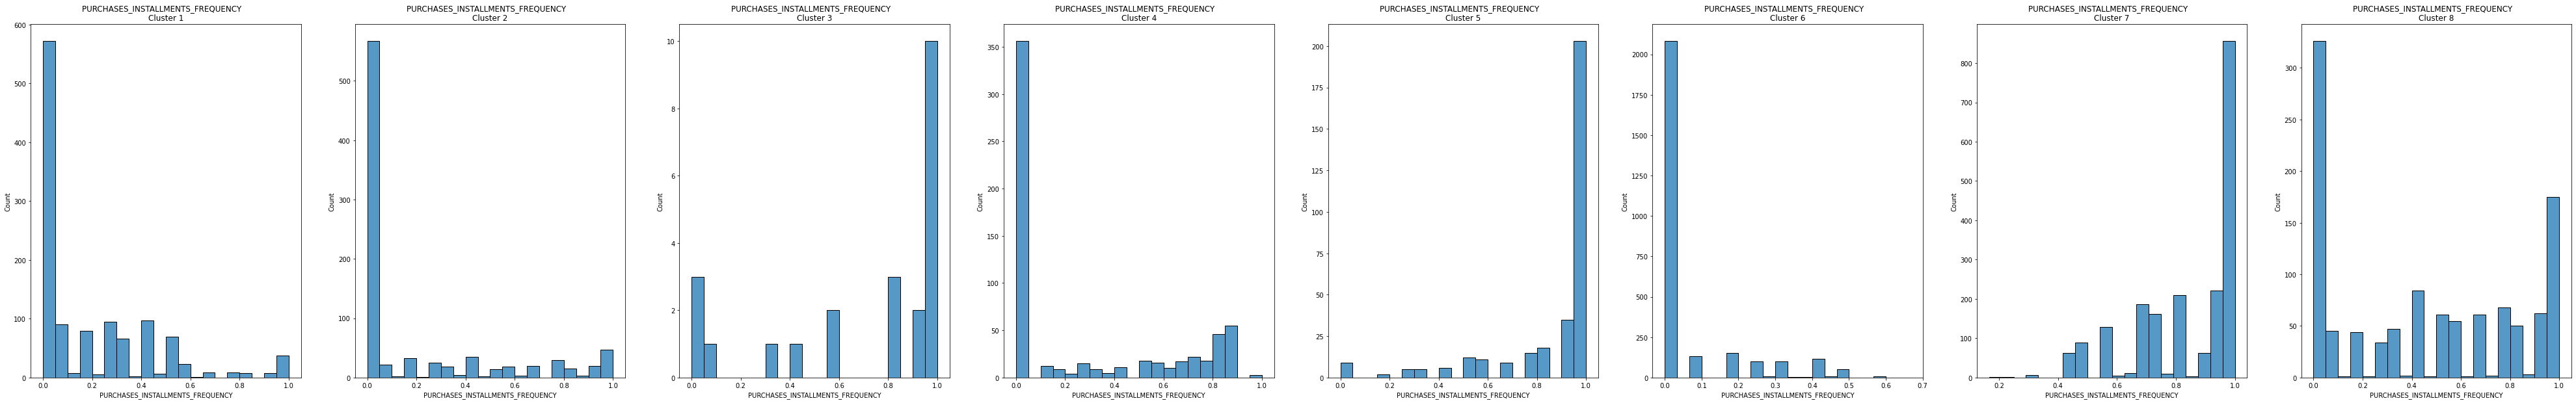

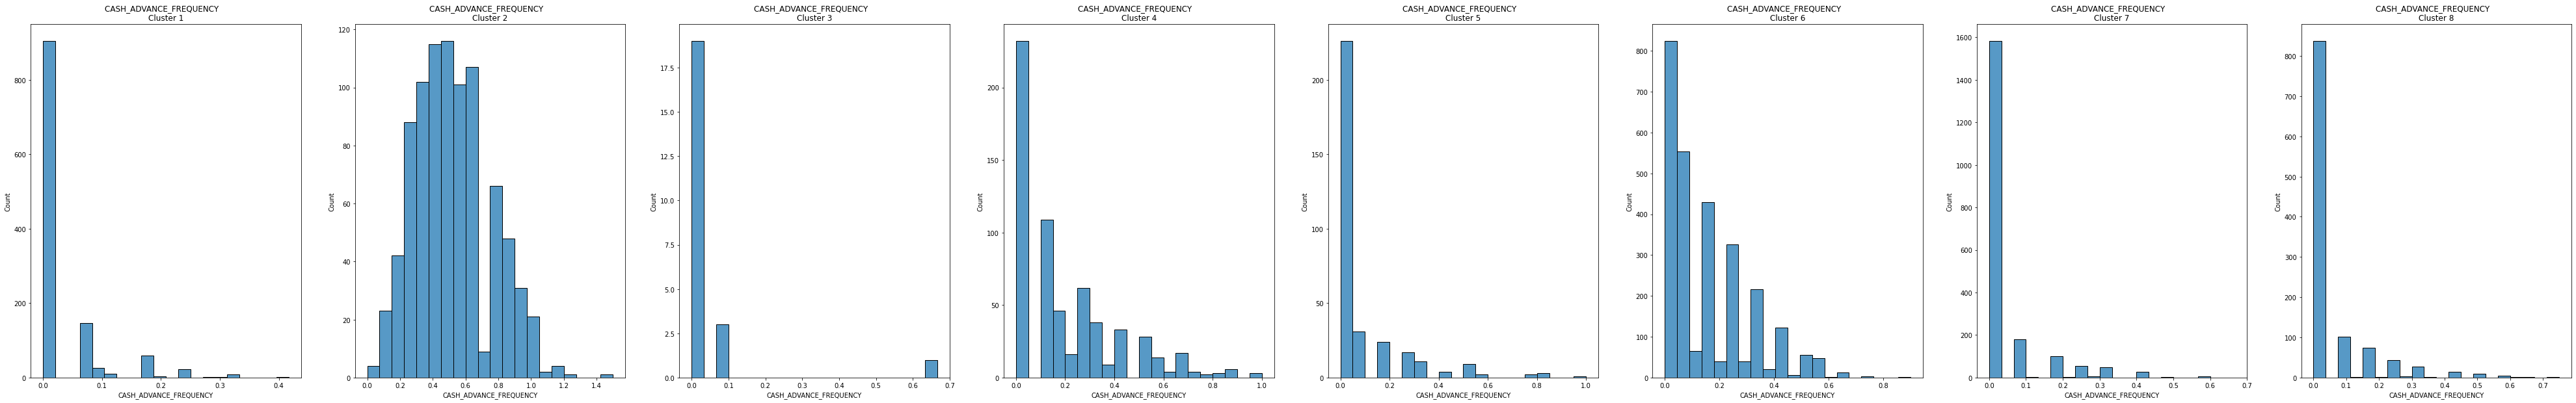

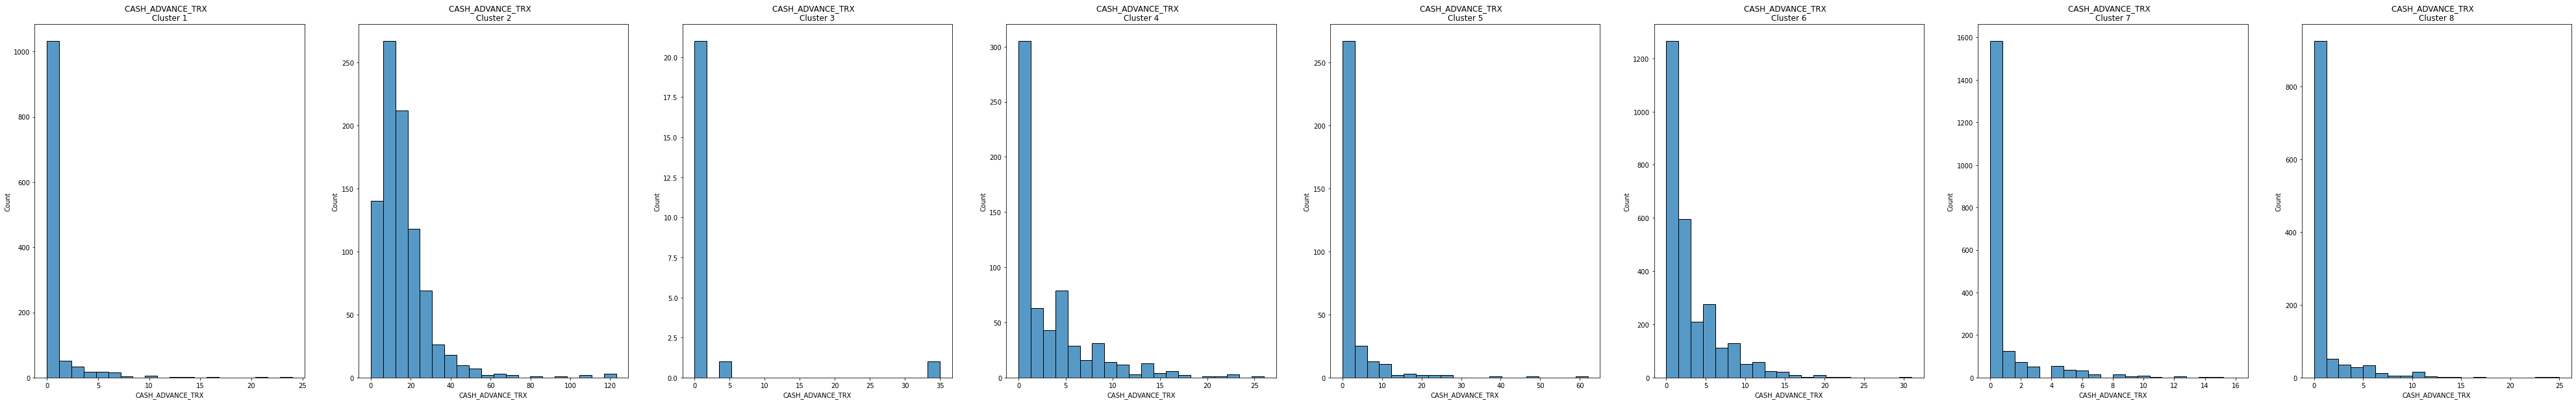

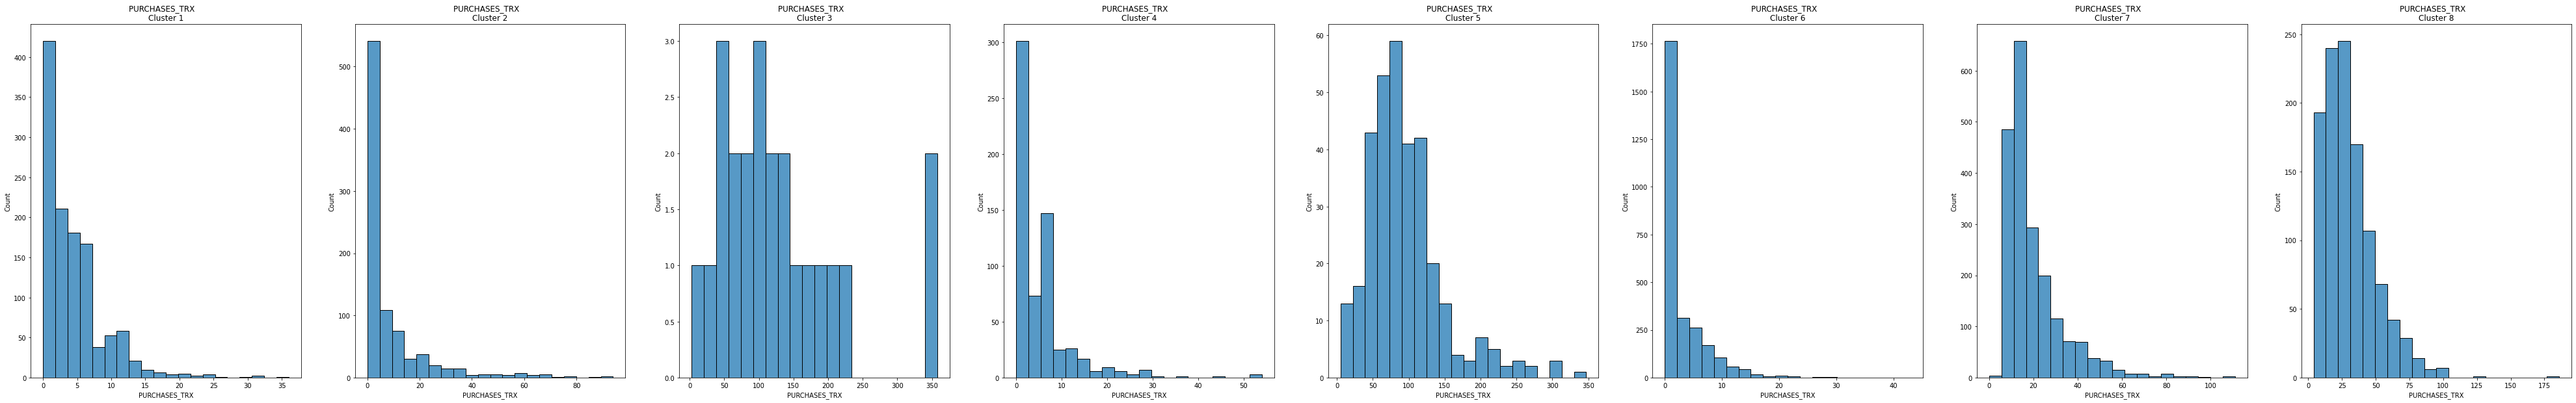

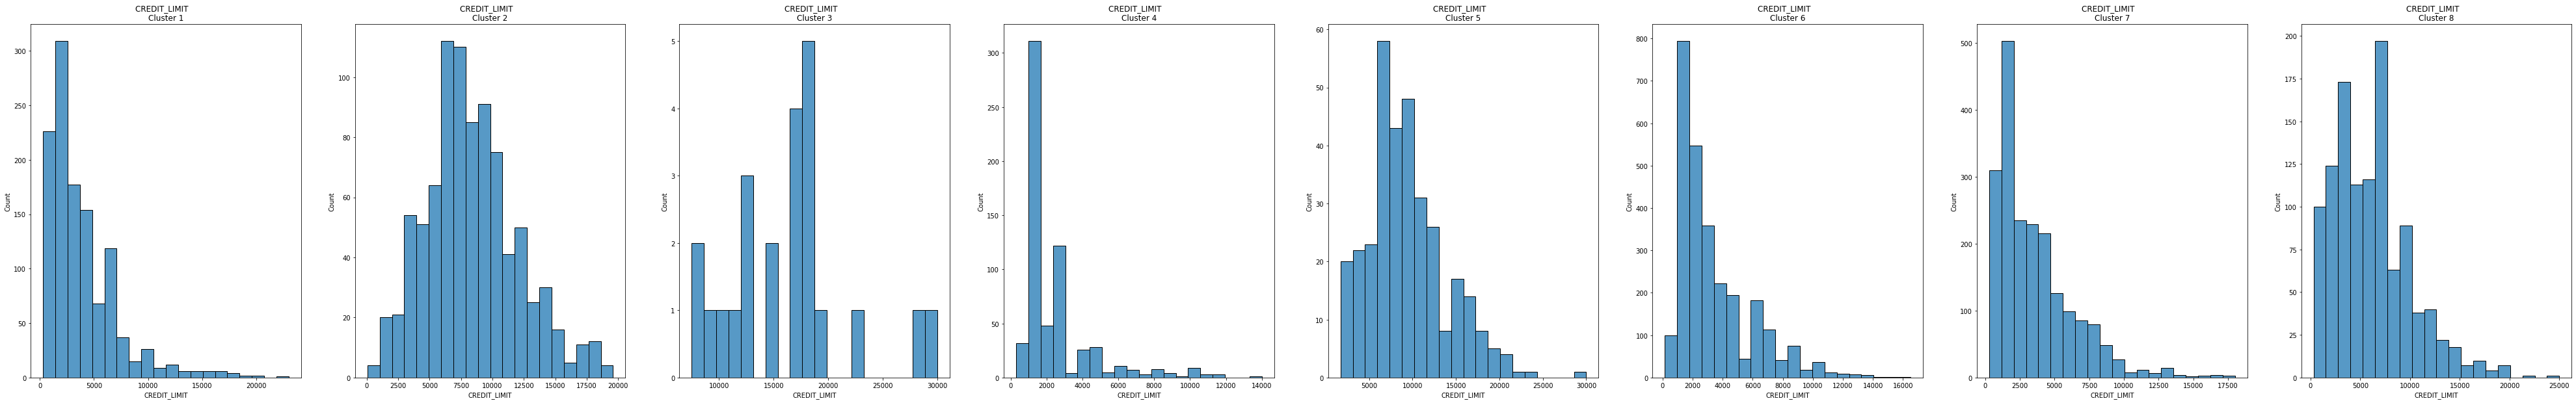

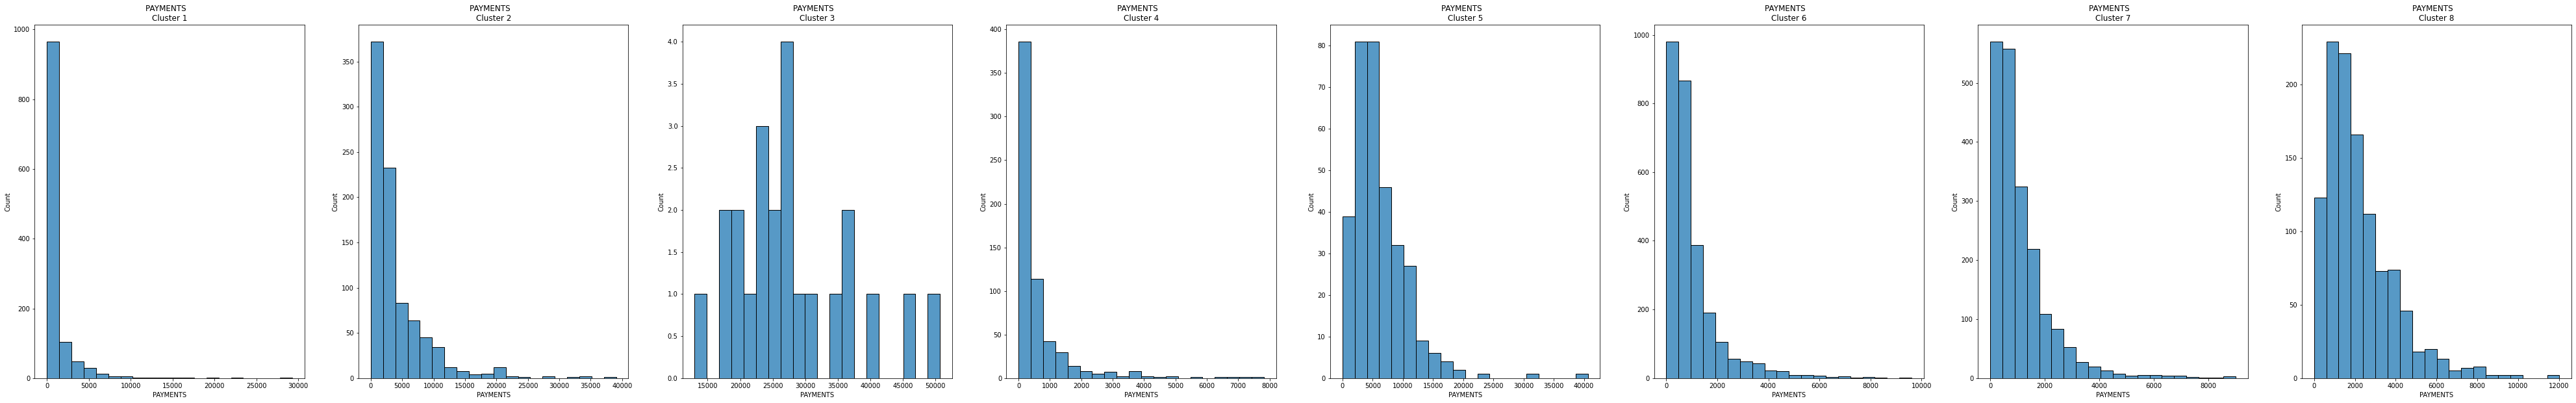

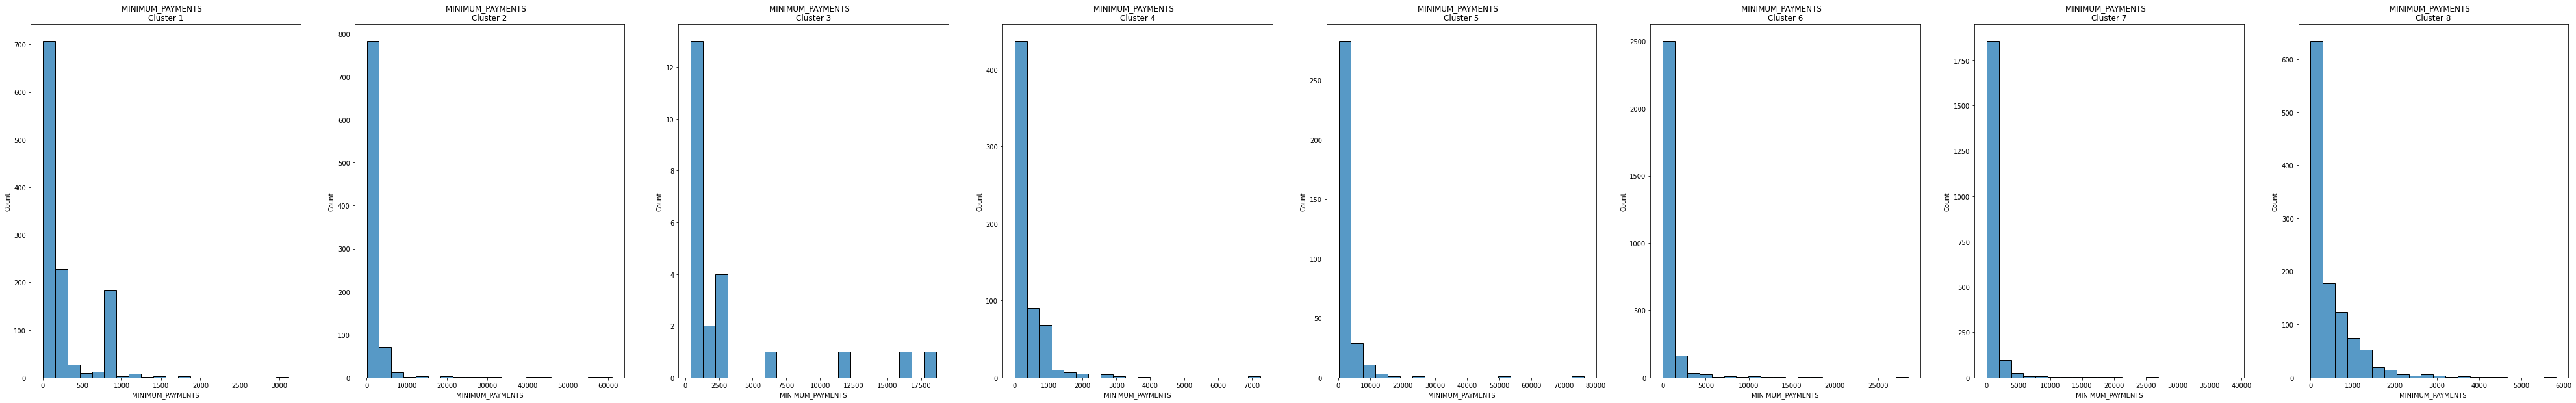

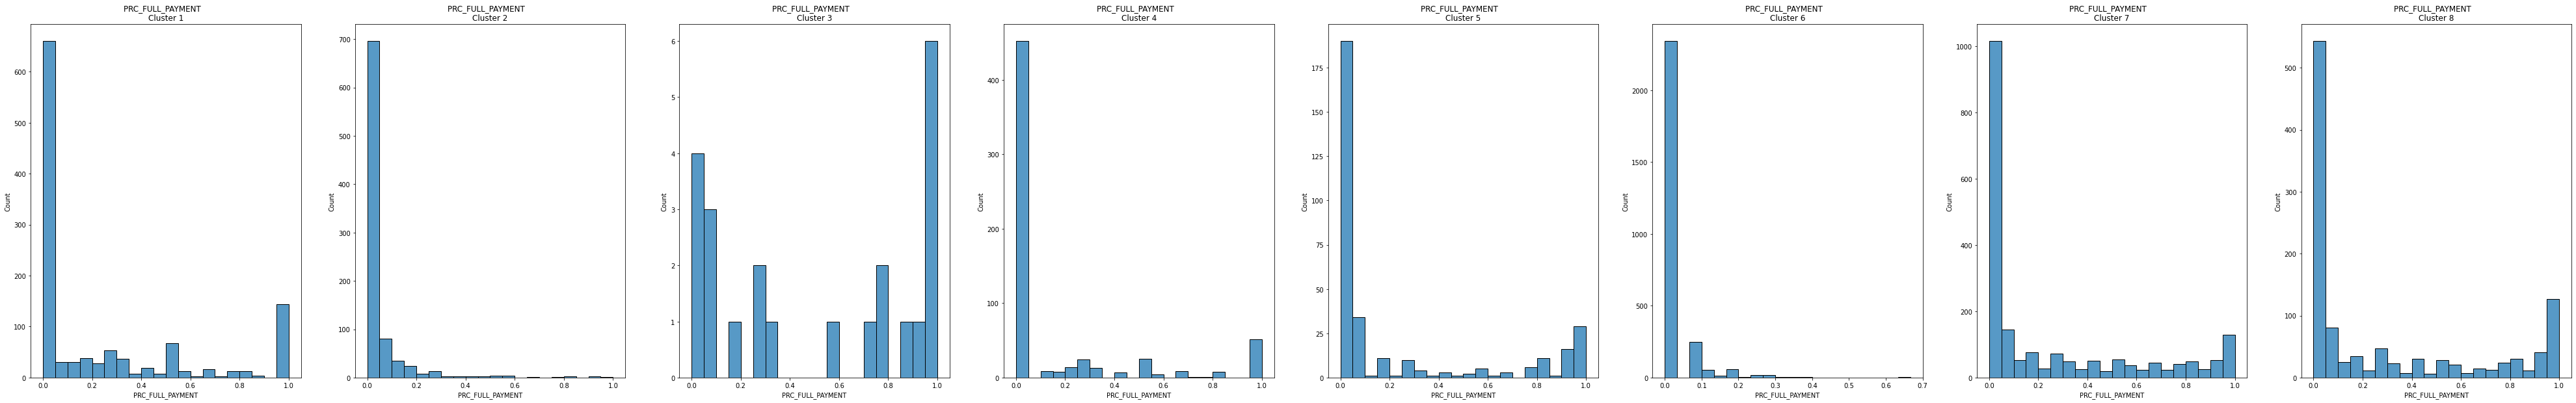

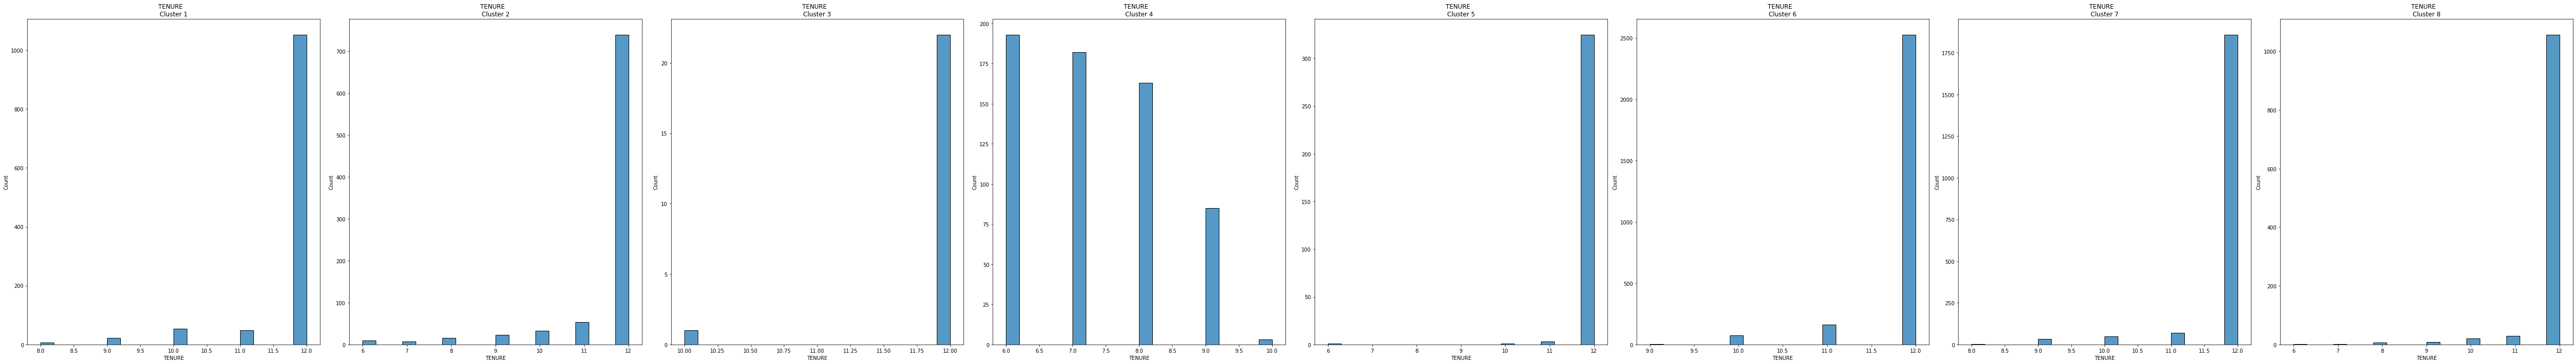

In [25]:

for i in range(len(df.columns)):
    plt.figure(figsize=(70,10))
    for j in range(8):
        plt.subplot(1,8,j+1)
        sns.histplot(data=df_kmeans[df_kmeans["Cluster"] == j],x=df.columns[i],bins=20)
        plt.title("{}   \nCluster {}".format(df_kmeans.columns[i],j+1))
plt.tight_layout()

In [26]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222085, -1.07645201],
       [-1.13830629,  2.50644611],
       [ 0.96968837, -0.38350824],
       ...,
       [-0.92619717, -1.81076768],
       [-2.3365501 , -0.65796193],
       [-0.556424  , -0.40047291]])

In [27]:
pca_df = pd.DataFrame(principal_comp, columns = ["Comp1","Comp2"])
pca_df = pd.concat([pca_df,pd.DataFrame({"Cluster":labels})],axis=1)
pca_df

,Comp1,Comp2,Cluster
0,-1.682221,-1.076452,5
1,-1.138306,2.506446,1
2,0.969688,-0.383508,7
3,-0.873625,0.043175,5
4,-1.599435,-0.688584,5
...,...,...,...
8945,-0.359623,-2.016129,3
8946,-0.564352,-1.639077,3
8947,-0.926197,-1.810768,3
8948,-2.336550,-0.657962,3


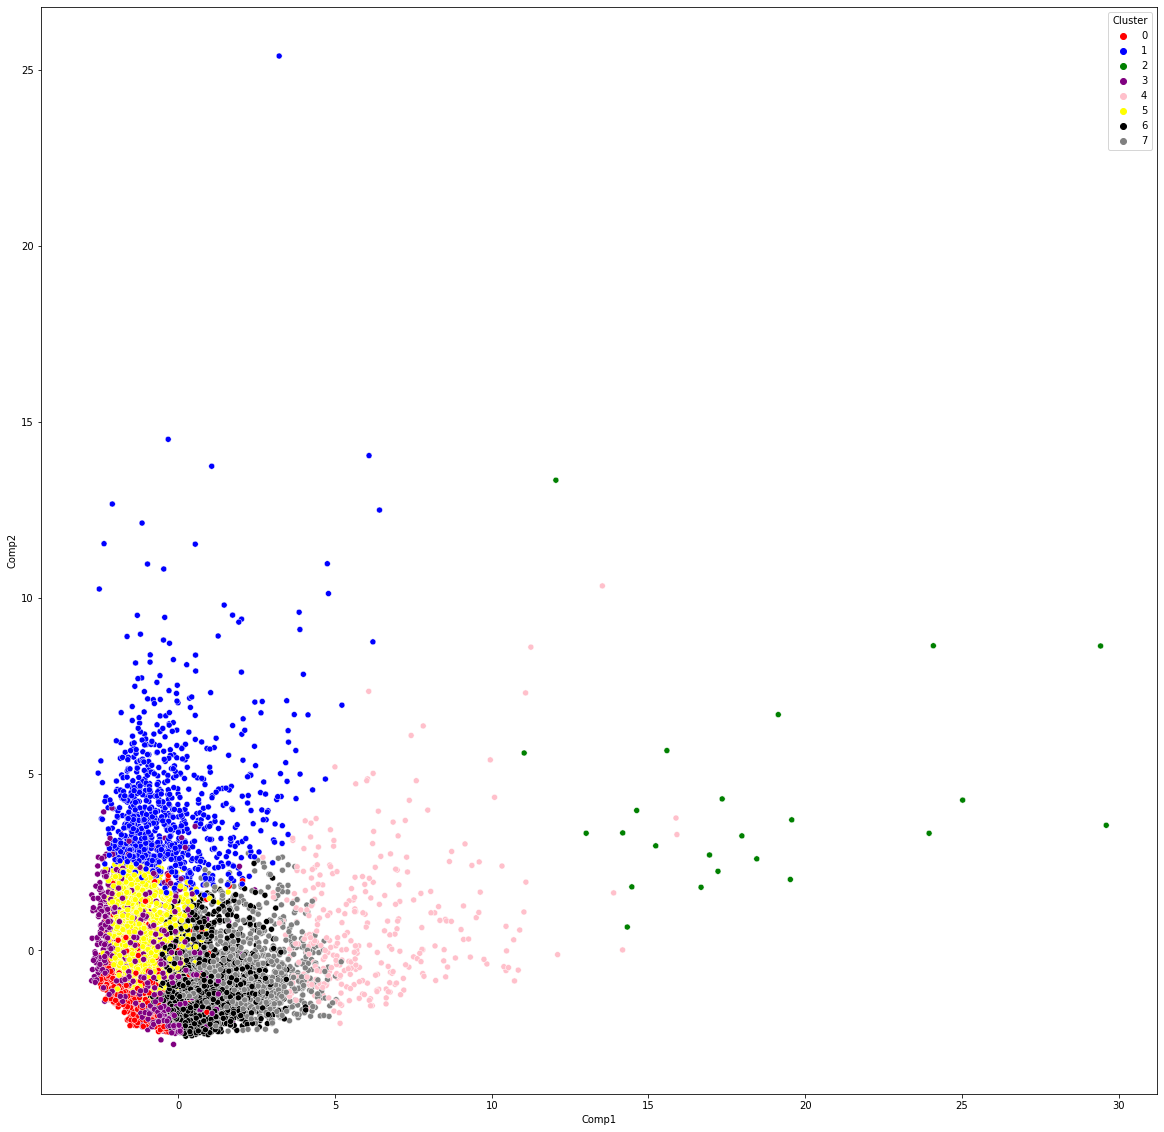

In [28]:
plt.figure(figsize=(20,20))
ax = sns.scatterplot(x="Comp1", y="Comp2", data=pca_df, hue="Cluster",palette=["red","blue","green","purple","pink","yellow","black","gray"])

# Optimizacion de KNN usando encoder

#### El objetivo de este encoder es poder realizar el modelo de knn pero ya no con 17 variables, sino con menos. Con el objetivo de mejorar nuestro modelo.

In [29]:
#importando librerias
from tensorflow.keras.layers import Input,Add,Dense,Activation,ZeroPadding2D,BatchNormalization, Flatten, Conv2D, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [31]:
encoding_din = 7
input_df = Input(shape=(17,))
x = Dense(encoding_din,activation = "relu")(input_df)
x = Dense(500,activation="relu",kernel_initializer = "glorot_uniform")(x)
x = Dense(500,activation="relu",kernel_initializer = "glorot_uniform")(x)
x = Dense(2000,activation="relu",kernel_initializer = "glorot_uniform")(x)

encoded = Dense(10, activation="relu",kernel_initializer = "glorot_uniform")(x)

x = Dense(2000,activation="relu",kernel_initializer = "glorot_uniform")(encoded)
x = Dense(500,activation="relu",kernel_initializer = "glorot_uniform")(x)

decoded = Dense(17, kernel_initializer = "glorot_uniform")(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = "adam", loss="mean_squared_error")

In [32]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_1 (Dense)             (None, 7)                 126       
                                                                 
 dense_2 (Dense)             (None, 500)               4000      
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_5 (Dense)             (None, 10)                20010     
                                                                 
 dense_6 (Dense)             (None, 2000)              22000 

In [33]:
autoencoder.fit(df_scaled,df_scaled, batch_size=128,epochs = 25, verbose =1)

Epoch 1/25
70/70 [==============================] - 2s 21ms/step - loss: 0.5310
Epoch 2/25
70/70 [==============================] - 1s 21ms/step - loss: 0.3128
Epoch 3/25
70/70 [==============================] - 1s 20ms/step - loss: 0.2419
Epoch 4/25
70/70 [==============================] - 1s 21ms/step - loss: 0.1925
Epoch 5/25
70/70 [==============================] - 1s 21ms/step - loss: 0.1711
Epoch 6/25
70/70 [==============================] - 2s 21ms/step - loss: 0.1503
Epoch 7/25
70/70 [==============================] - 1s 21ms/step - loss: 0.1413
Epoch 8/25
70/70 [==============================] - 1s 21ms/step - loss: 0.1587
Epoch 9/25
70/70 [==============================] - 1s 21ms/step - loss: 0.1327
Epoch 10/25
70/70 [==============================] - 1s 20ms/step - loss: 0.1181
Epoch 11/25
70/70 [==============================] - 2s 22ms/step - loss: 0.1106
Epoch 12/25
70/70 [==============================] - 1s 20ms/step - loss: 0.1052
Epoch 13/25
70/70 [==================

In [34]:
autoencoder.save_weights("autoencoder.h5")

In [35]:
pred = encoder.predict(df_scaled)

280/280 [==============================] - 1s 3ms/step


In [38]:
pred

array([[0.        , 0.42250013, 0.7122443 , ..., 0.3568164 , 0.12765232,
        0.        ],
       [0.        , 2.3380227 , 1.6259762 , ..., 0.        , 2.0028956 ,
        0.        ],
       [0.        , 0.27566183, 0.02902089, ..., 0.55345225, 2.0439403 ,
        0.        ],
       ...,
       [0.        , 0.        , 4.277921  , ..., 2.9599438 , 0.88706553,
        0.        ],
       [0.        , 0.        , 3.9885018 , ..., 1.6210016 , 0.9076732 ,
        0.        ],
       [0.        , 0.        , 4.1690035 , ..., 3.304356  , 2.235803  ,
        0.        ]], dtype=float32)

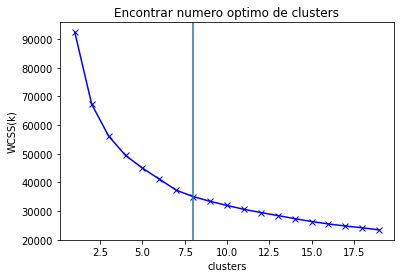

In [40]:
scores_2 = []

for i in range(1,20):
    kmeans_encoded = KMeans(n_clusters=i)
    kmeans_encoded.fit(pred)
    scores_2.append(kmeans_encoded.inertia_) #suma de los cuadrados intra-clusters
    


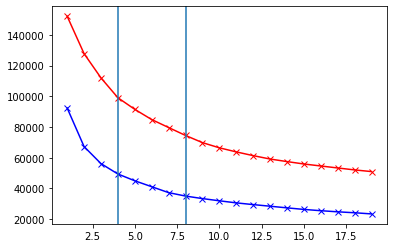

In [56]:
plt.plot(range(1,20), scores_1, "bx-", color="r")
plt.plot(range(1,20), scores_2, "bx-", color="b")
plt.axvline(x=4)
plt.axvline(x=8)

In [45]:
kmeans_encoded = KMeans(4)
kmeans_encoded.fit(pred)
labels_encoded = kmeans_encoded.labels_
y_kmeans_encoded = kmeans_encoded.fit_predict(pred)

In [47]:
df_cluster_encoder = pd.concat([df_kmeans,pd.DataFrame({"cluster_encoder":labels_encoded})],axis=1)
df_cluster_encoder

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,cluster_encoder
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3,3


In [54]:
pca_encoder = PCA(n_components = 2)
principal_comp_encoder = pca_encoder.fit_transform(pred)

pca_df_encoder = pd.DataFrame(principal_comp_encoder, columns = ["Comp1_encoder","Comp2_encoder"])
pca_df_encoder = pd.concat([pca_df_encoder,pd.DataFrame({"cluster_encoder":labels_encoded})],axis=1)
pca_df_encoder

,Comp1_encoder,Comp2_encoder,cluster_encoder
0,-1.932193,-0.117229,0
1,0.162592,1.635242,0
2,-0.751907,-0.080782,0
3,-1.495669,-0.413750,0
4,-2.200073,-0.060357,0
...,...,...,...
8945,2.581996,-0.929554,3
8946,1.419160,-0.859789,3
8947,1.547705,-0.404605,3
8948,0.310519,0.732227,3


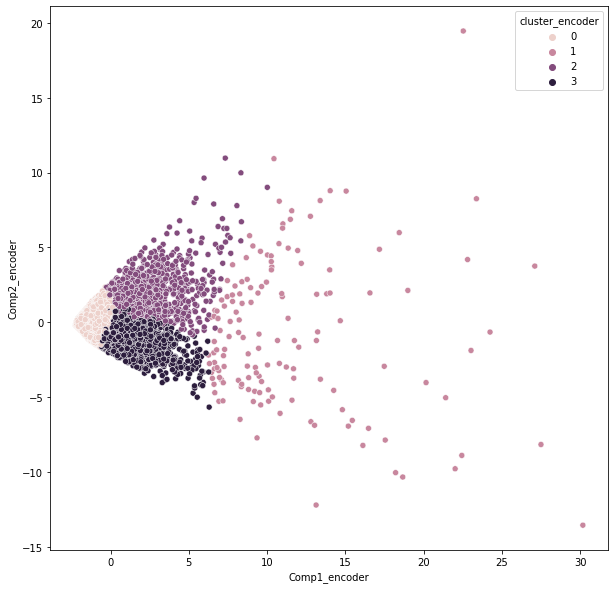

In [55]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=pca_df_encoder,x="Comp1_encoder",y="Comp2_encoder",hue="cluster_encoder")